Dans ce notebook vous allez apprendre à faire un bilan des sources d'incertitude et à associer à chaque source une distribution statistique.

# Sources d'incertitudes et bilan.

## Faire un bilan des sources
Pour rappel, pour un mesurande directe il faut :
* identifier ces facteurs (ces __sources d'incertitudes__)
* associer à chaque _source d'incertitude_ une __distribution statistique__ et __un écart-type__.
* __combiner__ ces sources pour obtenir l'incertitude-type sur le mesurande étudié.

```{attention}
Attention, une source d'incertitude ne correspond pas à une grandeur d'influence mais à une contrainte __pratique__ qui augmente la dispersion des résultats de mesurage. __Une source d'incertitude est liée à une grandeur mesurée.__
```

```{danger}
IL FAUT REFLECHIR ET NE PAS APPLIQUER DES RECETTES DE CUISINE SANS LES COMPRENDRE.
```

## Sources usuelles
### Limitation de la précision de la mesure.
C'est la principale source d'incertitude que nous allons rencontré. En effet, généralement lors d'une mesure, les limitations de l'instrument, le flou (en optique) et la variation de la grandeur mesurée fera qu'on ne __pourra pas dire mieux que : le résultat de mesure se trouve dans tel intervalle.__

````{topic} Exemple : la mesure à la règle d'une position (ici les traits noir et vert)
```{figure} ./images/mesure_regle.jpg
:name: mesure_regle
:align: center
:width: 60%
Mesure avec une règle
```

* Pour le trait noir (fin), la détermination de sa position est limitée par les graduations de la règle.
    * On peut dire que la mesure est entre $[3.7 cm; 3.8cm]$.
    * On choisira donc une distribution uniforme (toutes les valeurs 3.7 et 3.8 cm semblent possible de manière égale) d'intervale $[3.7 cm; 3.8cm]$.
    * L'incertitude-type sera $1 / \sqrt{12} = 0.29 cm$
* Pour le trait vert (épais), on n'a plus un trait entre deux valeurs (cas d'une image un peu floue en optique).
    * On peut simplement dire que la mesure est entre $[4.4 cm; 4.7cm]$ (on ne limite par contre aux graduations car l'instrument ne permet pas mieux).
    * On choisira donc une distribution uniforme (toutes les valeurs 4.4 et 4.7 cm semblent possible de manière égale) d'intervale $[4.4 cm; 4.7cm]$.
    * L'incertitude-type sera $3 / \sqrt{12} = 0.87 cm$
````

```{margin}
On fait souvent le choix d'une distribution uniforme lorsqu'on est confronté à un intervalle de valeur de lecture acceptable.
```
```{topic} Exemple : La fluctuation d'un appareil
:class: tip
On considère la mesure d'une tension $U$ au moyen d'un multimètre numérique. Mais l'affichage fluctue et on observe que la mesure varie entre deux valeurs extrêmes : 2.43 V et 2.48 V.

On va donc choisire une distribution uniforme d'intervale $[2.43 V; 2.48 V]$. 

L'incertitude-type sera $0.05 / \sqrt{12} = 0.014 V$ (cf. suite).
```

### Données d'un constructeur
On est souvent amené à utiliser les données d'un constructeur pour estimer une incertitude.

```{sidebar} Variabilité d'un instrument de mesure.
* Le cas de la lentille et du multimètre sont tout de même différents.
  * _Dans le cas du multimètre_, il s'agit de la fidélité de l'instrument de mesure : elle représente le fait qu'en reprenant plusieurs fois la même mesure avec le même appareil, on risque d'obtenir des valeurs différentes (même si la mesure est stable). On ne peut rien faire dans la manipulation sinon tenir compte de cette dispersion annoncée.
  * _Dans le cas de la lentille_, il s'agit de la dispersion des valeurs de focale dans un lot de lentilles fabriquées par le constructeur. Mais la lentille que vous utilisez possède une valeur de focale qui varie peu. On utilise alors la dispersion des valeur de 10% parce qu'on est pas sûr de la valeur de f'. Ce n'est donc pas une vraie dispersion __lors de la mesure__ mais plutôt l'utilisation du fait que f' possède une gamme de valeurs possibles. En pratique, _si on avait le temps_, il serait sage de réaliser une manipulation permettant de mesurer la distance focale f' de __notre__ lentille (car nous sommes capables d'améliorer une incertitude de 10% !!). Si on n'a pas le temps, on prend l'étude du constructeur sur son processus de fabrication (les 10%) à la place.
```
```{topic} Exemples
* On utilise une lentille mince en optique de distance focale $f' = 10 cm$, le constructeur nous dit que sa distance focale est connue à 10%.
    * __Sans plus d'informations__, on considèrera qu'il s'agit de l'incertitude-type associée à une distribution uniforme. On va donc associer à la valeur f' une incertitude de distribution uniforme centrée en $10 cm$ et de demie-largeur $\frac{10}{100} \times 10 = 1 cm$.
* Le multimètre numérique utilisé précédemment pour la mesure de U (dont la valeur mesurée est donc $\frac{2.43 + 2.48}{2} = 2.455 V$) est sujet à une dispersion des valeurs données, même si l'affichage est stable. Ainsi, le constructeur nous dit que la valeur mesurée, sur le calibre utilisé, possède une incertitude de 2%.
    * A nouveau peu d'information, on va à nouveau considérer une distribution uniforme centrée sur 2.455 V et de demie-largeur $\frac{2}{100} \times 2.455 = 0.049 V$.

```
```{margin}
Il n'est pas nécessaire de passer beaucoup de temps sur le choix d'une distribution. L'uniforme convient bien. 
```

## Combiner plusieurs sources d'incertitude
Il arrive fréquemment qu'il existe plusieurs sources d'incertitudes pour un même mesurande. 

```{margin} Exemple
C'est le cas de la mesure de la tension U : il y a une incertitude sur la lecture de la valeur et une incertitude liée à l'instrument.
```

````{topic} Méthodes
Pour estimer l'incertitude-type totale sur le mesurande $U$, on dispose de deux méthodes :
1. On simule les processus aléatoires de chaque sources d'incertitude grâce aux distributions choisie un grand nombre de fois et on simule ainsi la variabilité du mesurande. On parle de __simulation de Monte-Carlo__.
1. On réalise une __propagation des variances__ (application des propriétés de la variance mathématique sur des lois statistiques) ce qui nous donne l'incertitude-type (mais pas la distribution).
````

### Simulation de Monte-Carlo.
#### Principe
Le principe est le suivant :
1. Pour chaque source d'incertitude  __indépendante__, on a choisi une distribution statistique et son écart-type. On peut donc simuler la variabilité causée par chaque source en réalisant un tirage aléatoire de N échantillons suivant la loi statistique choisie __centrée en 0__.
2. On somme alors les différents tirages avec le résultat de mesurage ce qui nous donne la valeur simulée du mesurande soumise à la variabilité de TOUTES les sources.
3. On peut alors tracer l'histogramme des valeurs pour observer la distribution obtenus et calculer l'__écart-type__ associé pour estimer l'incertitude-type totale.

````{topic} Exemple
> Dans le cas de la tension U, la procédure sera :
> 1. On simule N échantillons d'une distribution uniforme entre $-0.014 V$ et $0.014 V$ (simulation de l'incertitude liée à la lecture de la valeur).
> 2. On simule N échantillons d'une distribution gaussienne d'écart-type $0.049 V$ centrée en 0 (simulation de l'incertitude liée à la variabilité de l'appareil de mesure).
> 3. On somme les échantillons des deux distributions et on ajoute la valeur mesurée (ici 2.455). On obtient ainsi N échantillons simulés de $U$.
> 4. On étudie la distribution statistique ainsi obtenue et on déterminer l'incertitude-type sur U grâce à l'écart-type des N tirages.

```{glue:figure} tension_u
:name: label_image
:align: center
Titre
```

On obtient U = {glue:text}`tension_u_m:.3f` $\pm$ {glue:text}`tension_u_u:.3f` V.
````

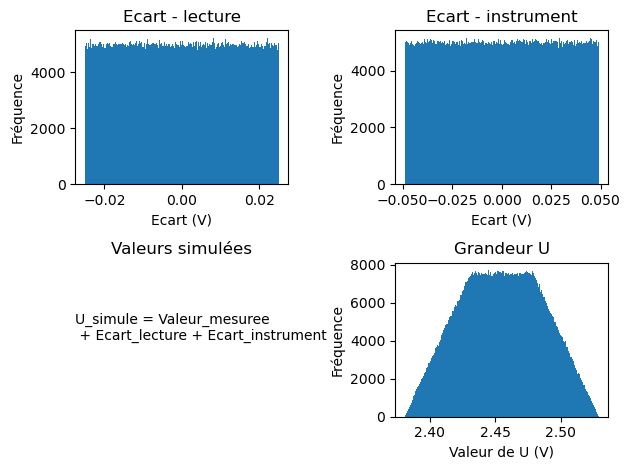

2.455

0.03173442267484425

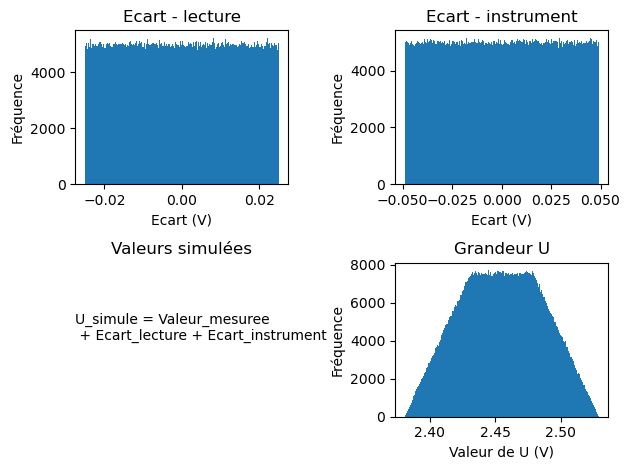

In [1]:
from myst_nb import glue
"""Importation des bibliothèques

On commence par importer les bibliothèques utiles matplotlib.pyplot, numpy et numpy.random.
"""
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rd

"""Simulation des composantes

On simule chaque composante
"""
N = 1000000  # Nombre d'échantillons
Uval = 2.455  # Résultat de mesurage pour Uval
llec = 0.025  # Demie-largeur de la distribution uniforme associée à la lecture de la valeur
lins = 0.049  # Ecart-type de la distribution gaussienne associée à la fidélité de l'instrument
echlec = rd.uniform(-llec, llec, N)  # La fonction uniform génèrera un vecteur de taille N
echins = rd.uniform(-lins, lins, N)

"""
On simule U et on calcule son incertitude-type
"""
echU = echlec + echins + Uval  # On simule U en ajoutant le résultat de mesurage
uU = np.std(echU, ddof=1)  # std est une fonction de numpy. L'option ddof=1 permet de diviser par N-1 et non par N ce qui est plus précis.
#print("On a donc : U = {:.3f} +/- {:.3f}".format(Uval, uU))

"""
On réalise le tracé de la distribution des U simulés.
"""
f, ax = plt.subplots(2,2)  # Création de la figure f est des axes ax dans la figure f
ax[0,0].set_title("Ecart - lecture")
ax[0,0].set_xlabel("Ecart (V)")
ax[0,0].set_ylabel("Fréquence")
ax[0,0].hist(echlec, bins='rice')

ax[0,1].set_title("Ecart - instrument")
ax[0,1].set_xlabel("Ecart (V)")
ax[0,1].set_ylabel("Fréquence")
ax[0,1].hist(echins, bins='rice')

ax[1,0].set_title("Valeurs simulées")
ax[1,0].text(0,0.5, "U_simule = Valeur_mesuree \n + Ecart_lecture + Ecart_instrument")
ax[1,0].axis('off')

ax[1,1].set_title("Grandeur U")
ax[1,1].set_xlabel("Valeur de U (V)")
ax[1,1].set_ylabel("Fréquence")
ax[1,1].hist(echU, bins='rice')

f.tight_layout()

glue("tension_u", f, display=False)
glue("tension_u_m", Uval, display=False)
glue("tension_u_u", uU, display=False)

### Propagation des variances

Cette méthode sera présentée plus tard.